In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telco_base_data = pd.read_csv('Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.shape


(7043, 21)

In [5]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [7]:
telco_base_data['Churn'] = np.where(telco_base_data.Churn == 'Yes',1,0)

/Users/rithvik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


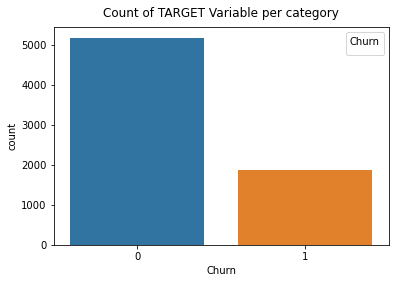

In [8]:
sns.countplot(telco_base_data['Churn'])
plt.title("Count of TARGET Variable per category", y=1.02)
plt.legend(title='Churn')

In [9]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

0    73.463013
1    26.536987
Name: Churn, dtype: float64

# Data is highly imbalanced, ratio = 73:27

In [10]:

labels = []
for i in range(1, 72, 12):
    labels.append("{0} - {1}".format(i, i + 11))

telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [11]:
df=telco_base_data

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
tenure_group        11
dtype: int64

In [13]:
df.dropna(how = 'any', inplace = True)


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [15]:
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


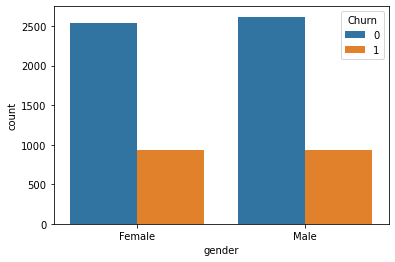

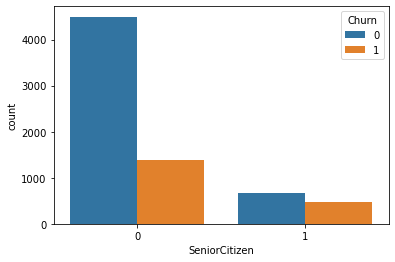

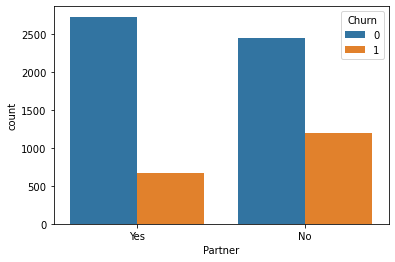

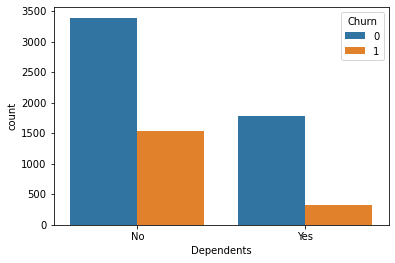

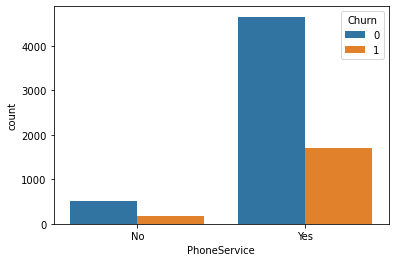

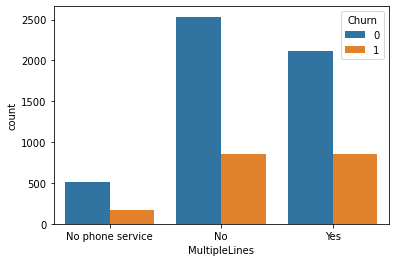

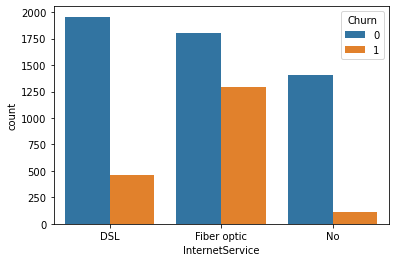

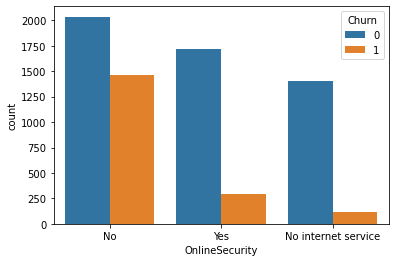

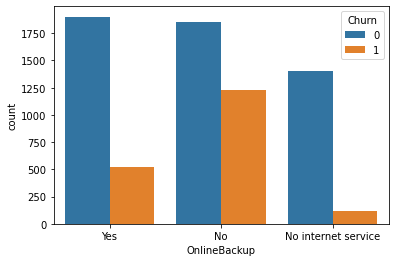

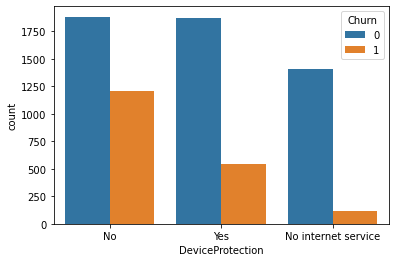

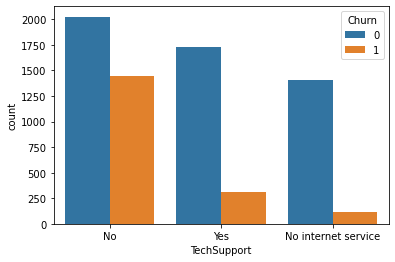

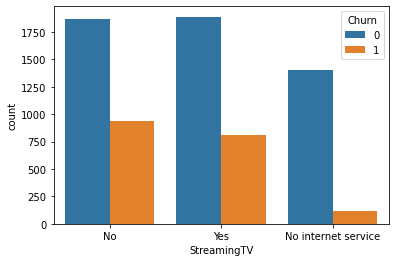

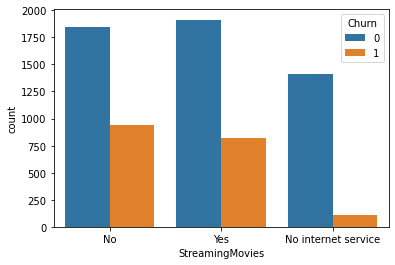

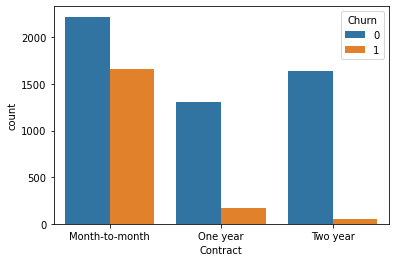

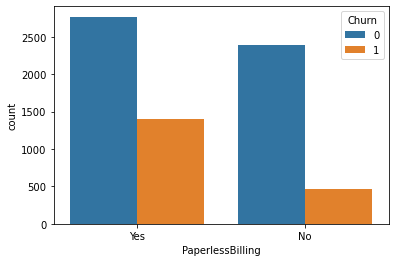

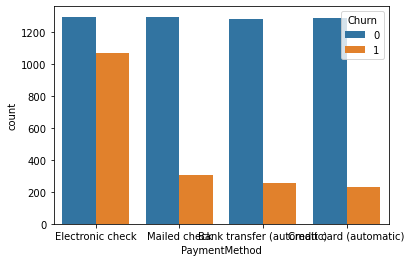

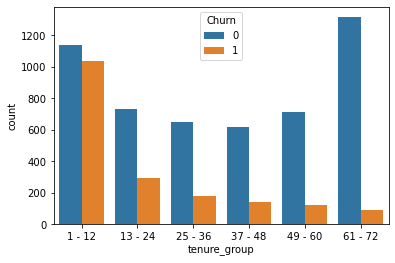

In [16]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')


In [17]:
df1=pd.get_dummies(df)

In [18]:
df1.head()

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,53.85,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Monthly charges by churn')

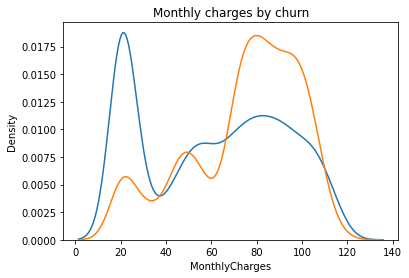

In [19]:


a=sns.kdeplot(df1.MonthlyCharges[(df1['Churn']==0)])
a=sns.kdeplot(df1.MonthlyCharges[(df1['Churn']==1)])
a.set_title('Monthly charges by churn')

In [20]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Model application

In [21]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [22]:
df1.head()

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,53.85,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
x=df1.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,53.85,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,0,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
7039,0,103.20,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7040,0,29.60,1,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
7041,1,74.40,0,1,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [24]:
y=df1['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

In [26]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=10, min_samples_leaf=10)

In [27]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=100)

In [28]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
model_dt.score(x_test,y_test)

0.746268656716418

In [30]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1018
           1       0.54      0.50      0.52       389

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.74      0.75      0.74      1407



# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 10,max_depth=10, min_samples_leaf=10)

In [51]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=10)

In [52]:
y_pred=model_rf.predict(x_test)

In [53]:
model_rf.score(x_test,y_test)

0.7235252309879175